In [ ]:
#!pip install matplotlib
#!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.1 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.4/11.1 MB 4.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/11.1 MB 5.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/11.1 MB 5.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.1 MB 7.0 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/11.1 MB 7.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.1 MB 7.8 MB/s eta 0:00:02
   ---------- ----------------------------- 3.0/11.1 MB 8.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/11.1 MB 8.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.1 MB 8.5 MB/s eta 0:00:01
   --------------- ------------------------ 4.3/11.1 MB 8.5 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/11.1 MB 8.9 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
data_root = "Data/"
cab_rides = pd.read_csv(data_root + "cab_rides.csv")

In [11]:
cab_rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [12]:
cab_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


what categories exist and how many
districts belong to each category by using the value_counts()

In [13]:
cab_rides["cab_type"].value_counts()

cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64

The describe() method shows a summary of
the numerical attributes

In [14]:
cab_rides.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


A quick way to get a feel of the type of data  is to plot a histogram for each numerical attribute. 

The histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, we can call the hist() method on the whole dataset and it will plot a histogram for each numerical attribute like below

array([[<Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'time_stamp'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'surge_multiplier'}>]], dtype=object)

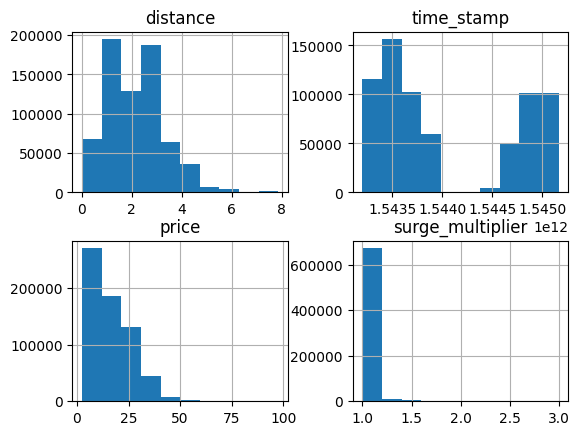

In [ ]:
cab_rides.hist()

In [19]:
cab_rides.select_dtypes(include=['number']).corr()

,distance,time_stamp,price,surge_multiplier
distance,1.000000,0.003553,0.345061,0.024769
time_stamp,0.003553,1.000000,0.000808,0.000572
price,0.345061,0.000808,1.000000,0.240458
surge_multiplier,0.024769,0.000572,0.240458,1.000000


###  General Rule of Thumb for stratification
##### Dataset < 50,000 samples → Stratify (especially if classes are imbalanced)
##### Dataset > 100,000 samples → Stratification is usually not necessary


### So in this case we don't need to stratify ( can keep it as an option for cases that doesnt work that well )

Then, make sure we put the test set aside and you are only exploring the training set.

In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cab_rides, test_size=0.2,  random_state=42)

<Axes: xlabel='distance', ylabel='price'>

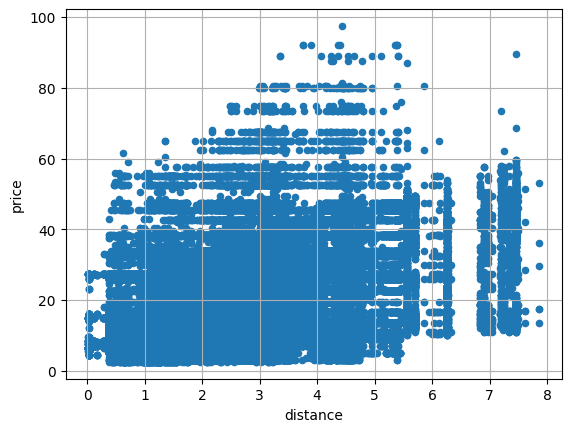

In [21]:
cab_rides.plot(kind='scatter', x='distance', y='price',grid=True)


array([[<Axes: xlabel='distance', ylabel='distance'>,
        <Axes: xlabel='time_stamp', ylabel='distance'>,
        <Axes: xlabel='price', ylabel='distance'>,
        <Axes: xlabel='surge_multiplier', ylabel='distance'>],
       [<Axes: xlabel='distance', ylabel='time_stamp'>,
        <Axes: xlabel='time_stamp', ylabel='time_stamp'>,
        <Axes: xlabel='price', ylabel='time_stamp'>,
        <Axes: xlabel='surge_multiplier', ylabel='time_stamp'>],
       [<Axes: xlabel='distance', ylabel='price'>,
        <Axes: xlabel='time_stamp', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='surge_multiplier', ylabel='price'>],
       [<Axes: xlabel='distance', ylabel='surge_multiplier'>,
        <Axes: xlabel='time_stamp', ylabel='surge_multiplier'>,
        <Axes: xlabel='price', ylabel='surge_multiplier'>,
        <Axes: xlabel='surge_multiplier', ylabel='surge_multiplier'>]],
      dtype=object)

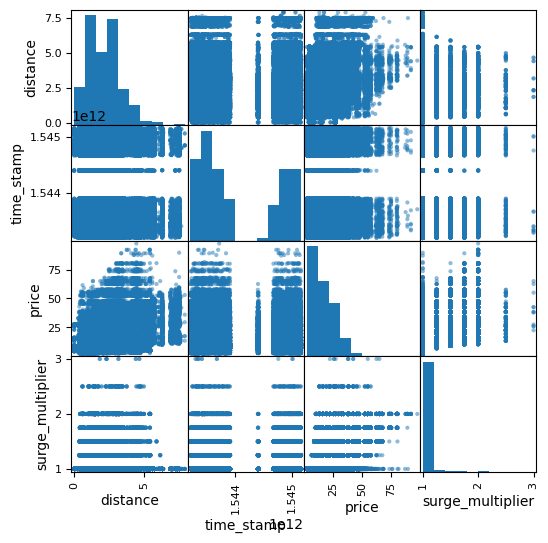

In [23]:
from pandas.plotting import scatter_matrix

numeric_cols = cab_rides.select_dtypes(include=['number'])
scatter_matrix(numeric_cols, figsize=(6,6))